In [11]:
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import  matplotlib.pyplot as plt

In [12]:
x,y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

In [13]:
def generate_10_random_numbers(param_range,p): 
    r=[*range(param_range[0],param_range[1])]
    s=random.sample(r,p)
    x=sorted(s)
    return x

In [14]:
def divide_into_folds(x_train,y_train,folds):
    split=len(x_train)/folds
    start=0
    data_group=[]
    label_group=[]
    while start<len(x_train):
        data_group.append(x_train[int(start):int(start+split)])
        label_group.append(y_train[int(start):int(start+split)])
        start+=split
    return data_group,label_group    

In [15]:
def RandomSearchCV(x_train,y_train,classifier,param_range,folds):
    #p=10
    #params=generate_10_random_numbers(param_range,p)
    train_scores=[]
    test_scores=[]
    data_group,label_group=divide_into_folds(x_train,y_train,folds)
    for k in tqdm(params):  # here params is list of 10 random k values generated 
        test_acc=[]
        train_acc=[]
        for j in range(folds):
            X_train=[data_group[i] for i in range(folds) if i!=j]
            #print(X_train)
            X_train=[items for group in X_train for  items in group]
            #print(X_train)
            Y_train=[label_group[i] for i in range(folds) if i!=j]
            Y_train=[items for group in Y_train for items in group]
            X_test=data_group[j]
            Y_test=label_group[j]
            
            classifier.n_neighbors=k
            classifier.fit(X_train,Y_train)
            Y_predict=classifier.predict(X_test)
            accuracy1=accuracy_score(Y_test,Y_predict)
            test_acc.append(accuracy1)
            
            
            Y_predict=classifier.predict(X_train)
            accuracy2= accuracy_score(Y_train,Y_predict)
            train_acc.append(accuracy2)
        
        train_scores.append(np.mean(np.array(train_acc)))
        test_scores.append(np.mean(np.array(test_acc)))
        
    return train_scores,test_scores

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 17.93it/s]


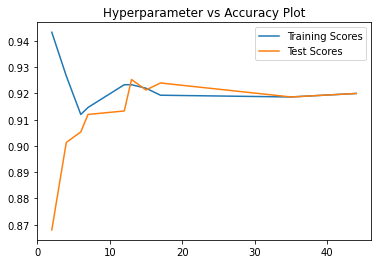

In [16]:
classifier=KNeighborsClassifier()
folds=3
param_range=(1,50)
p=10
params=generate_10_random_numbers(param_range,p)

train_scores,test_scores=RandomSearchCV(X_train,y_train,classifier,params,folds)
plt.plot(params,train_scores,label='Training Scores')
plt.plot(params,test_scores,label='Test Scores')
plt.title('Hyperparameter vs Accuracy Plot')
plt.legend()
plt.show()

In [17]:
def decision_boundary(x1,x2,y,clf):
    x1_min,x1_max=x1.min()-1,x1.max()+1
    x2_min,x2_max=x2.min()-1,x2.max()+1
    xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z)
    plt.scatter(x1, x2, c=y)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification")
    plt.show()
    

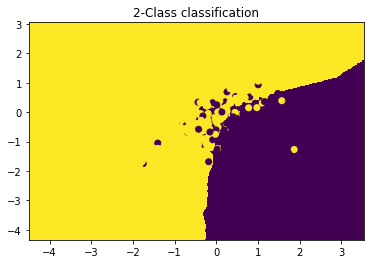

In [18]:
function=KNeighborsClassifier(n_neighbors=15).fit(X_train,y_train)
decision_boundary(X_train[:, 0], X_train[:,1], y_train, function)